In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://drive.google.com/file/d/1Tix_033d5kCT3lREOH12d0oPYGG5wl5J/view?usp=sharing'
output = 'heart-disease.csv'
gdown.download(url, output, fuzzy = True)
df = pd.read_csv('/content/heart-disease.csv')

Downloading...
From: https://drive.google.com/uc?id=1Tix_033d5kCT3lREOH12d0oPYGG5wl5J
To: /content/heart-disease.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 16.1MB/s]


In [ ]:
# Importar as bibliotecas necessárias


# Carregar o dataset (supondo que o arquivo esteja no formato CSV e já foi carregado no Colab)
df = pd.read_csv('heart-disease.csv')

# Mostrar as primeiras linhas do dataset para ter uma ideia dos dados
df.head()

# Exibir o resumo estatístico das variáveis
df.describe()

# Verificar a presença de valores nulos
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age: Age of the patient (in years)

sex: Sex of the patient (1 = male, 0 = female)


cp: Chest pain type (1-4)

trestbps: Resting blood pressure (in mm Hg on admission to the hospital)

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)


restecg: Resting electrocardiographic results (0-2)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


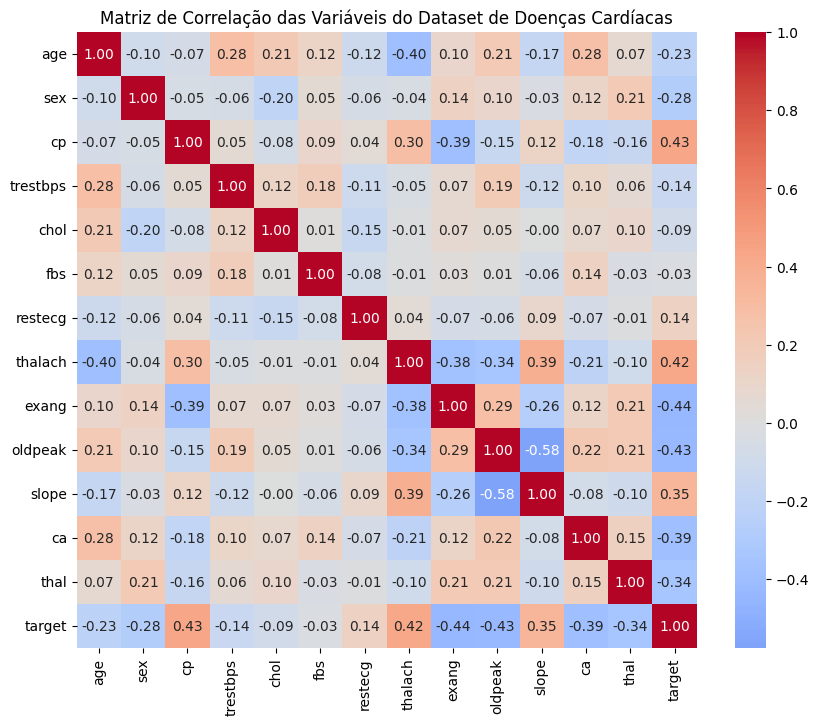

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de correlação
corr_matrix = df.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlação das Variáveis do Dataset de Doenças Cardíacas')
plt.show()

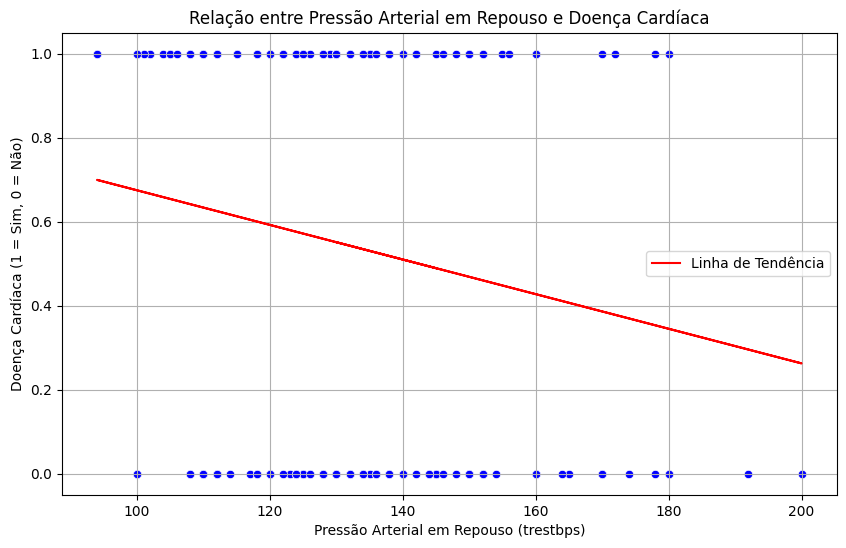

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='target', data=df, color='blue')

# Calcular a linha de regressão
slope, intercept, r_value, p_value, std_err = linregress(df['trestbps'], df['target'])
plt.plot(df['trestbps'], intercept + slope * df['trestbps'], 'r', label='Linha de Tendência')

plt.xlabel('Pressão Arterial em Repouso (trestbps)')
plt.ylabel('Doença Cardíaca (1 = Sim, 0 = Não)')
plt.title('Relação entre Pressão Arterial em Repouso e Doença Cardíaca')
plt.legend()
plt.grid(True)
plt.show()


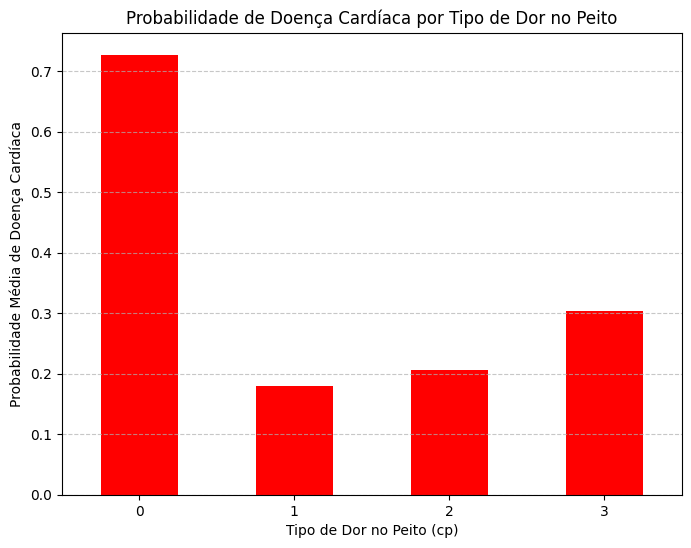

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular a média da variável target para cada tipo de dor no peito (cp)
mean_target_by_cp = 1 - df.groupby('cp')['target'].mean()  # Invertendo a interpretação

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
mean_target_by_cp.plot(kind='bar', color='red')
plt.xlabel('Tipo de Dor no Peito (cp)')
plt.ylabel('Probabilidade Média de Doença Cardíaca')
plt.title('Probabilidade de Doença Cardíaca por Tipo de Dor no Peito')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


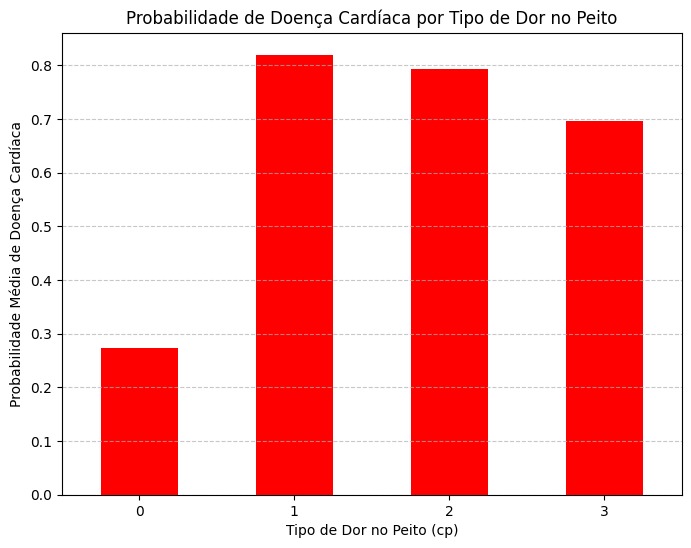

In [ ]:
# Calcular a média da variável target para cada tipo de dor no peito (cp)
mean_target_by_cp = df.groupby('cp')['target'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
mean_target_by_cp.plot(kind='bar', color='red')
plt.xlabel('Tipo de Dor no Peito (cp)')
plt.ylabel('Probabilidade Média de Doença Cardíaca')
plt.title('Probabilidade de Doença Cardíaca por Tipo de Dor no Peito')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

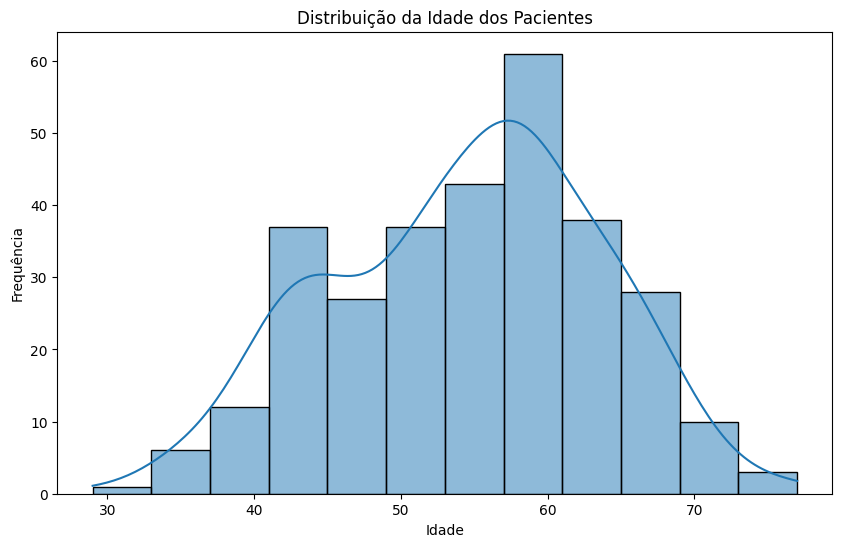

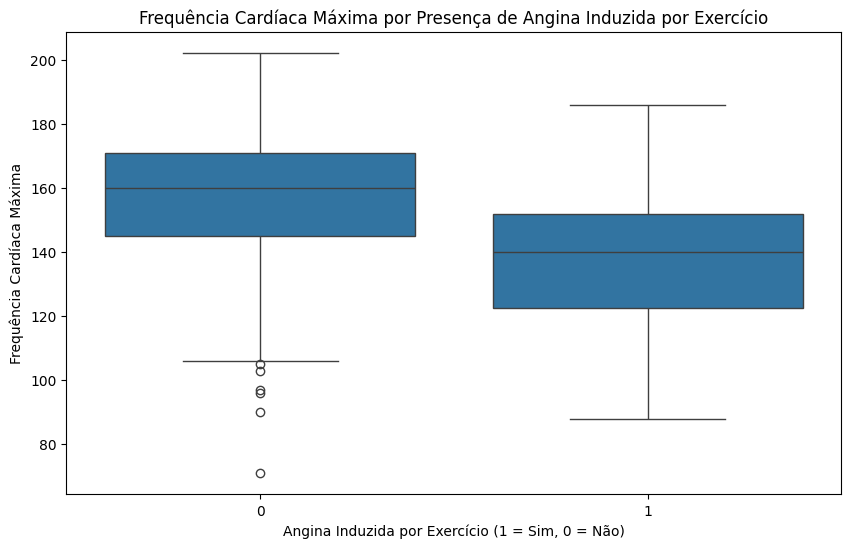

In [ ]:
# Gráfico de distribuição da idade dos pacientes
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Gráfico comparando a frequência cardíaca máxima entre pacientes com e sem angina induzida por exercício
plt.figure(figsize=(10, 6))
sns.boxplot(x='exang', y='thalach', data=df)
plt.title('Frequência Cardíaca Máxima por Presença de Angina Induzida por Exercício')
plt.xlabel('Angina Induzida por Exercício (1 = Sim, 0 = Não)')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show()

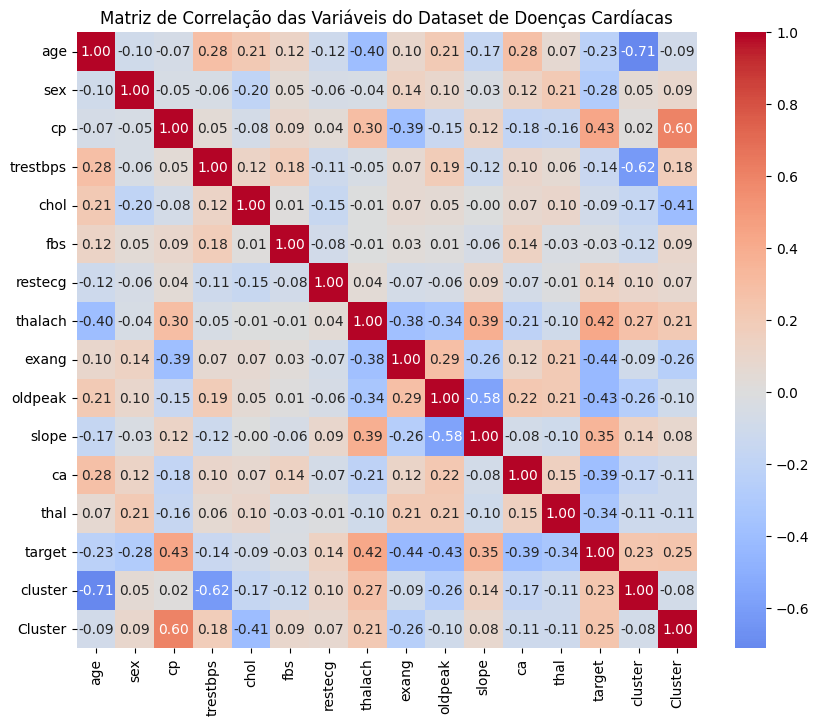

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de correlação
corr_matrix = df.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlação das Variáveis do Dataset de Doenças Cardíacas')
plt.show()

CA - numero de vasos principais coloridos (com problemas - obstruidos)


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,Cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2,1


target
1    165
0    138
Name: count, dtype: int64


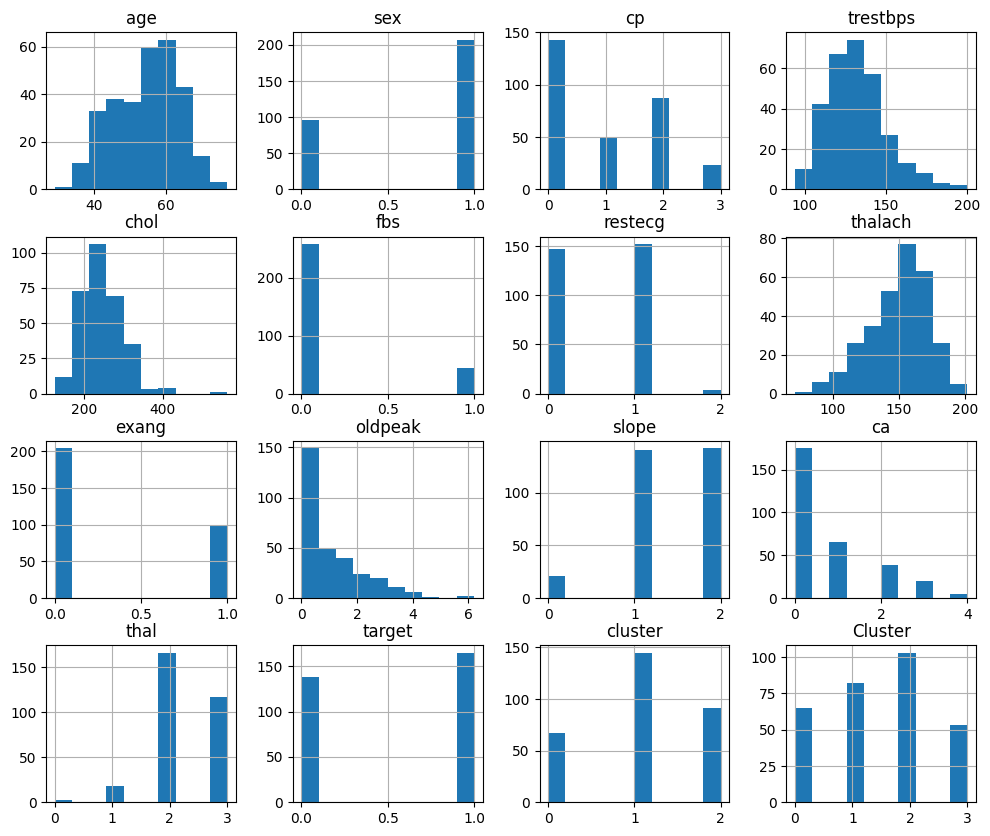

In [ ]:



print(df['target'].value_counts())


df.hist(figsize=(12, 10))
plt.show()





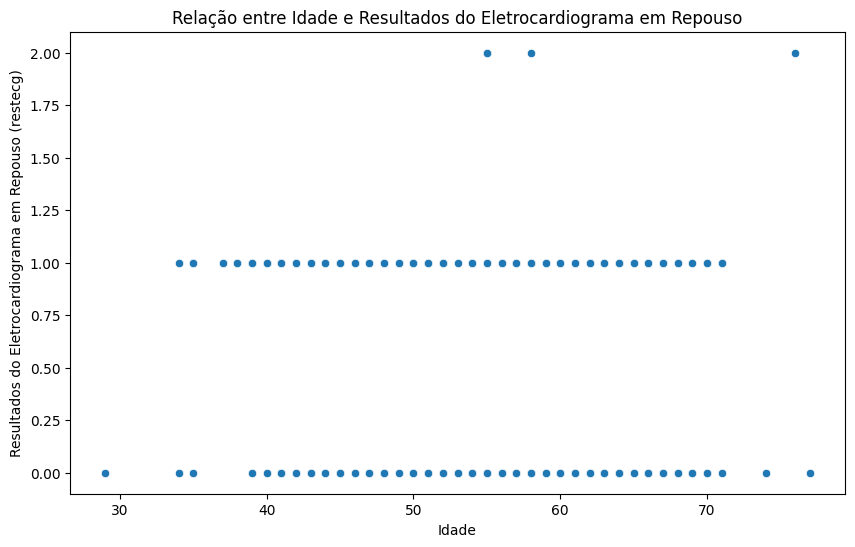

Correlação entre 'age' e 'restecg': -0.12


In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='restecg', data=df)
plt.title('Relação entre Idade e Resultados do Eletrocardiograma em Repouso')
plt.xlabel('Idade')
plt.ylabel('Resultados do Eletrocardiograma em Repouso (restecg)')
plt.show()


correlation = df['age'].corr(df['restecg'])
print(f"Correlação entre 'age' e 'restecg': {correlation:.2f}")


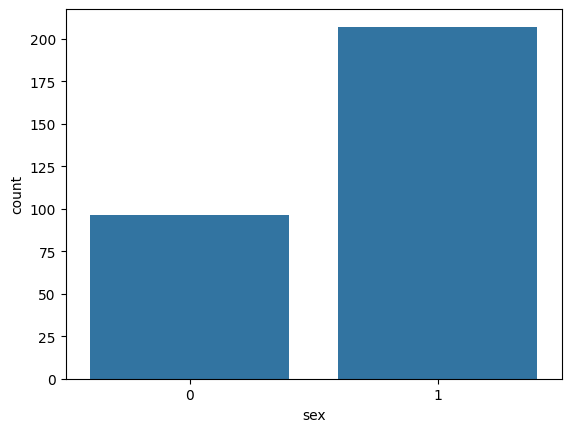

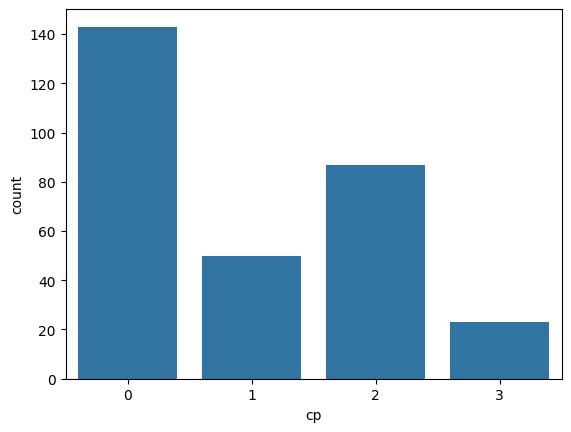

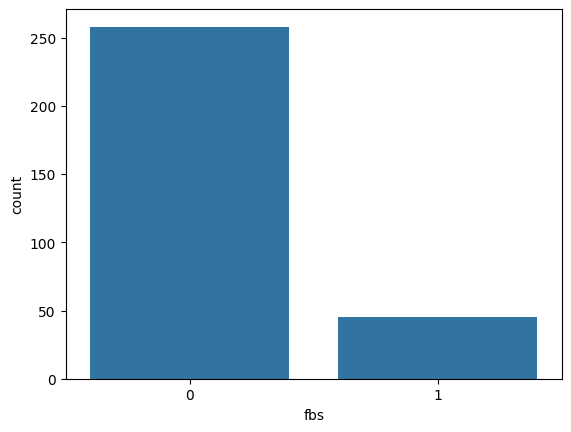

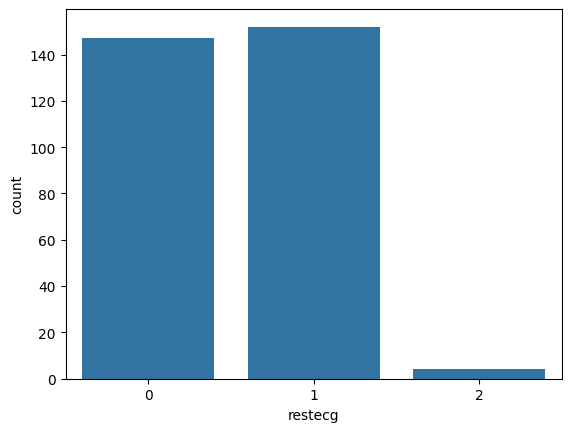

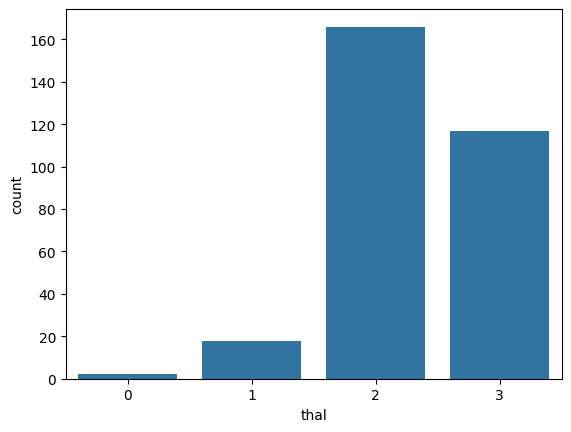

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['sex','cp','fbs','restecg','thal']

for col in cols:
    sns.countplot(x=col,data=df)
    plt.show()

Chance média de homens terem doenças cardíacas: 0.443678052113532


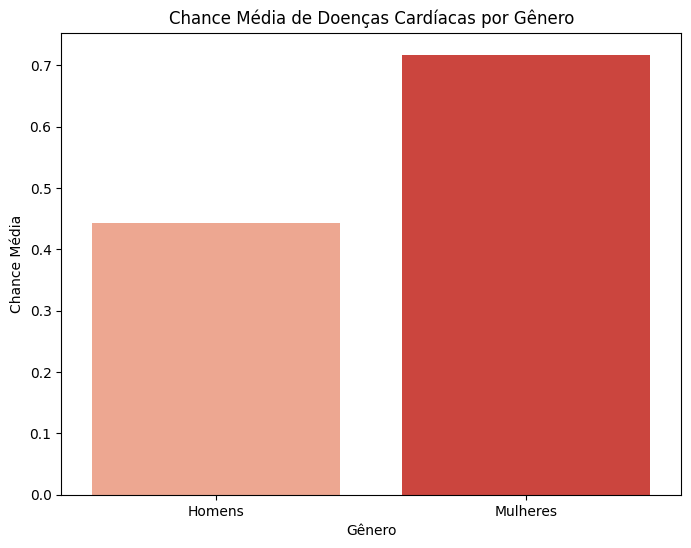

In [ ]:

men_df = df[df['sex'] == 1]
average_probability_men = men_df['predicted_probability'].mean()


women_df = df[df['sex'] == 0]
average_probability_women = women_df['predicted_probability'].mean()

print("Chance média de homens terem doenças cardíacas:", average_probability_men)


average_probabilities = pd.DataFrame({
    'Gênero': ['Homens', 'Mulheres'],
    'Chance Média': [average_probability_men, average_probability_women]
})


plt.figure(figsize=(8, 6))
sns.barplot(x='Gênero', y='Chance Média', data=average_probabilities, palette='Reds')
plt.title('Chance Média de Doenças Cardíacas por Gênero')
plt.show()

In [ ]:
women_df = df[df['sex'] == 0]


average_probability_women = women_df['predicted_probability'].mean()

print("Chance média de mulheres terem doenças cardíacas:", average_probability_women)

Chance média de mulheres terem doenças cardíacas: 0.717357510504505


In [ ]:
high_risk_df = df[df['predicted_probability'] > 0.5]


mean_cp_high_risk = high_risk_df['cp'].mean()
print("Média de cp para indivíduos com alta probabilidade de doença cardíaca:", mean_cp_high_risk)


low_risk_df = df[df['predicted_probability'] < 0.5]


mean_cp_low_risk = low_risk_df['cp'].mean()
print("Média de cp para indivíduos com baixa probabilidade de doença cardíaca:", mean_cp_low_risk)

Média de cp para indivíduos com alta probabilidade de doença cardíaca: 1.3756906077348066
Média de cp para indivíduos com baixa probabilidade de doença cardíaca: 0.36065573770491804


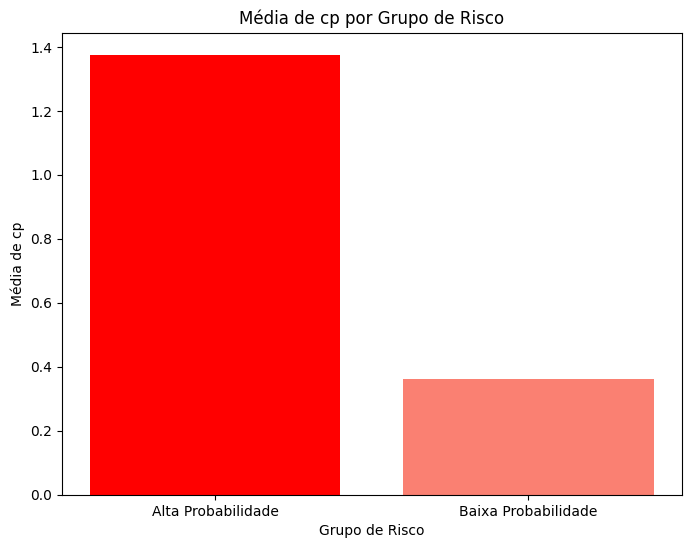

In [ ]:



data = {
    'Grupo': ['Alta Probabilidade', 'Baixa Probabilidade'],
    'Média de cp': [mean_cp_high_risk, mean_cp_low_risk]
}

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(data['Grupo'], data['Média de cp'], color=['red', 'salmon'])
plt.xlabel('Grupo de Risco')
plt.ylabel('Média de cp')
plt.title('Média de cp por Grupo de Risco')
plt.show()


In [ ]:
mean_cp_men = df[df['sex'] == 1]['cp'].mean()
print("Média de cp para homens:", mean_cp_men)

mean_cp_women = df[df['sex'] == 0]['cp'].mean()
print("Média de cp para mulheres:", mean_cp_women)


Média de cp para homens: 0.9323671497584541
Média de cp para mulheres: 1.0416666666666667


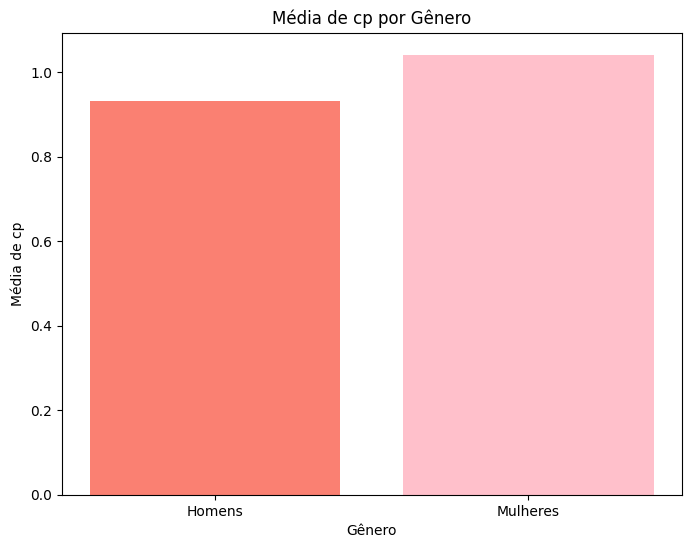

In [ ]:

mean_cp_men = df[df['sex'] == 1]['cp'].mean()
mean_cp_women = df[df['sex'] == 0]['cp'].mean()
plt.figure(figsize=(8, 6))
plt.bar(['Homens', 'Mulheres'], [mean_cp_men, mean_cp_women], color=['salmon', 'pink'])
plt.xlabel('Gênero')
plt.ylabel('Média de cp')
plt.title('Média de cp por Gênero')
plt.show()


In [ ]:


from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['cp'], df['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Valor qui-quadrado: {chi2}")
print(f"Valor-p: {p}")


alpha = 0.05
if p < alpha:
  print("Rejeitamos a hipótese nula. Existe uma associação significativa entre 'cp' e 'target'.")
else:
  print("Falhamos em rejeitar a hipótese nula. Não há evidências suficientes para sugerir uma associação entre 'cp' e 'target'.")


Valor qui-quadrado: 81.68642755194445
Valor-p: 1.3343043373050064e-17
Rejeitamos a hipótese nula. Existe uma associação significativa entre 'cp' e 'target'.


In [ ]:
from scipy.stats import ttest_ind

# Separar os dados em dois grupos:
# Grupo 1: Pacientes com angina induzida por exercício (exang = 1)
# Grupo 2: Pacientes sem angina induzida por exercício (exang = 0)
group1 = df[df['exang'] == 1]['thalach']  # Frequência cardíaca máxima para pacientes com angina induzida
group2 = df[df['exang'] == 0]['thalach']  # Frequência cardíaca máxima para pacientes sem angina induzida

# Realizar o teste t para amostras independentes
t_stat, p_value = ttest_ind(group1, group2)

# Mostrar o resultado do teste com explicação
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretação do resultado
alpha = 0.05  # Nível de significância comum
if p_value < alpha:
    print("Resultado: Existe uma diferença estatisticamente significativa na frequência cardíaca máxima (thalach) entre os dois grupos.")
else:
    print("Resultado: Não há diferença estatisticamente significativa na frequência cardíaca máxima (thalach) entre os dois grupos.")

T-statistic: -7.10
P-value: 0.0000
Resultado: Existe uma diferença estatisticamente significativa na frequência cardíaca máxima (thalach) entre os dois grupos.


In [ ]:
men_df = df[df['sex'] == 1]


average_probability_men = men_df['predicted_probability'].mean()

print("Chance média de homens terem doenças cardíacas:", average_probability_men)

Chance média de homens terem doenças cardíacas: 0.443678052113532


In [ ]:
df.shape

(303, 15)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)


y_pred_proba = model.predict_proba(X)[:, 1]

df['predicted_probability'] = y_pred_proba


mean_chol_high_risk = df[df['predicted_probability'] > 0.5]['chol'].mean()
print("Média de colesterol para indivíduos com alta probabilidade de doença cardíaca:", mean_chol_high_risk)

Média de colesterol para indivíduos com alta probabilidade de doença cardíaca: 243.86187845303868


In [ ]:
mean_chol_low_risk = df[df['predicted_probability'] < 0.5]['chol'].mean()
print("Média de colesterol para indivíduos com baixa probabilidade de doença cardíaca:", mean_chol_low_risk)

Média de colesterol para indivíduos com baixa probabilidade de doença cardíaca: 249.827868852459


    Variável  Importância
2         cp     0.776998
10     slope     0.627611
6    restecg     0.541312
7    thalach     0.027396
0        age     0.009543
5        fbs    -0.000891
4       chol    -0.001433
3   trestbps    -0.011920
9    oldpeak    -0.683334
11        ca    -0.746975
8      exang    -0.835663
12      thal    -1.015022
1        sex    -1.210769


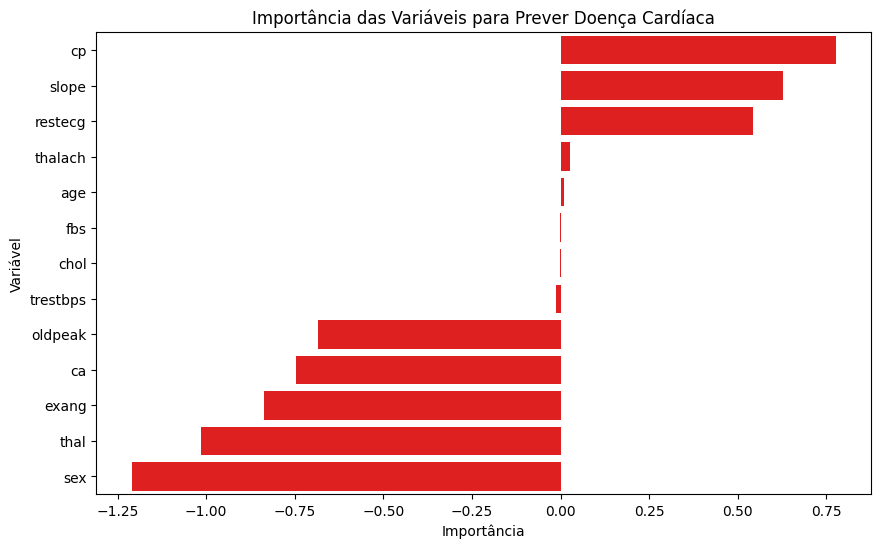

In [ ]:
importances = model.coef_[0]

feature_importances = pd.DataFrame({'Variável': X.columns, 'Importância': importances})
feature_importances = feature_importances.sort_values('Importância', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=feature_importances, color='red')
plt.title('Importância das Variáveis para Prever Doença Cardíaca')
plt.show()

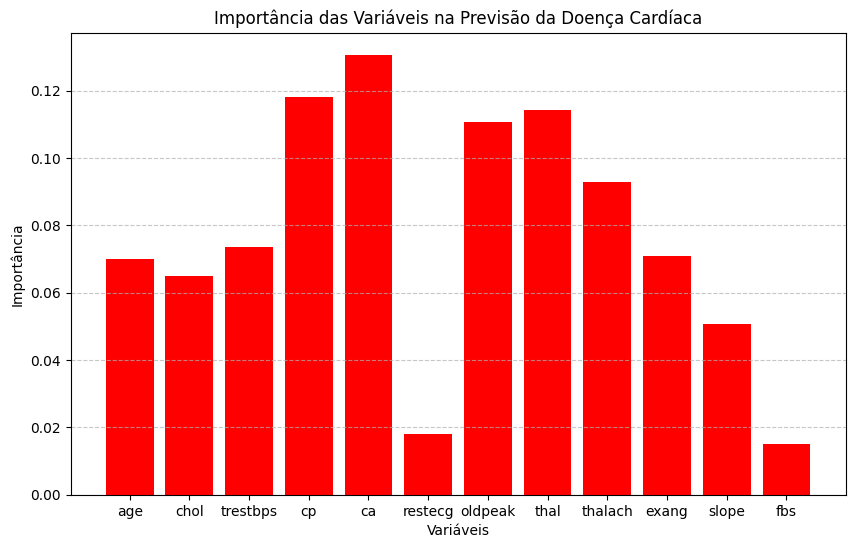

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes e a variável alvo
X = df[['age', 'chol', 'trestbps', 'cp','ca','restecg','oldpeak','thal','thalach','exang','slope','age','fbs']]
y = df['target']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obter a importância das variáveis
importances = model.feature_importances_
features = X.columns

# Criar o gráfico de barras para mostrar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='red')
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title('Importância das Variáveis na Previsão da Doença Cardíaca')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


               age       sex        cp    trestbps        chol       fbs  \
cluster                                                                    
0        58.970149  0.522388  1.089552  150.835821  289.208955  0.238806   
1        48.262069  0.689655  1.131034  124.620690  231.082759  0.096552   
2        60.703297  0.791209  0.615385  128.637363  238.835165  0.164835   

          restecg     thalach     exang   oldpeak     slope        ca  \
cluster                                                                 
0        0.402985  149.238806  0.373134  1.140299  1.373134  0.552239   
1        0.600000  162.337931  0.179310  0.491724  1.586207  0.282759   
2        0.505495  129.725275  0.527473  1.838462  1.120879  1.571429   

            thal    target   Cluster  
cluster                               
0        2.38806  0.462687  1.492537  
1        2.20000  0.786207  1.593103  
2        2.43956  0.219780  1.274725  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


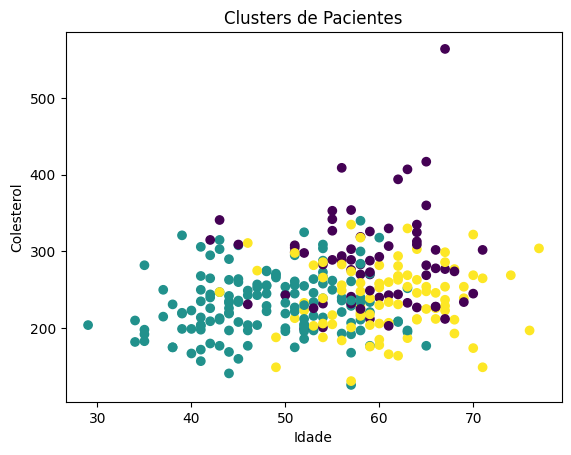

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = df[['age', 'chol', 'trestbps', 'thalach', 'oldpeak','ca']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(scaled_features)


labels = kmeans.labels_
df['cluster'] = labels
cluster_means = df.groupby('cluster').mean()
print(cluster_means)
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['chol'], c=df['cluster'], cmap='viridis')
plt.xlabel('Idade')
plt.ylabel('Colesterol')
plt.title('Clusters de Pacientes')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


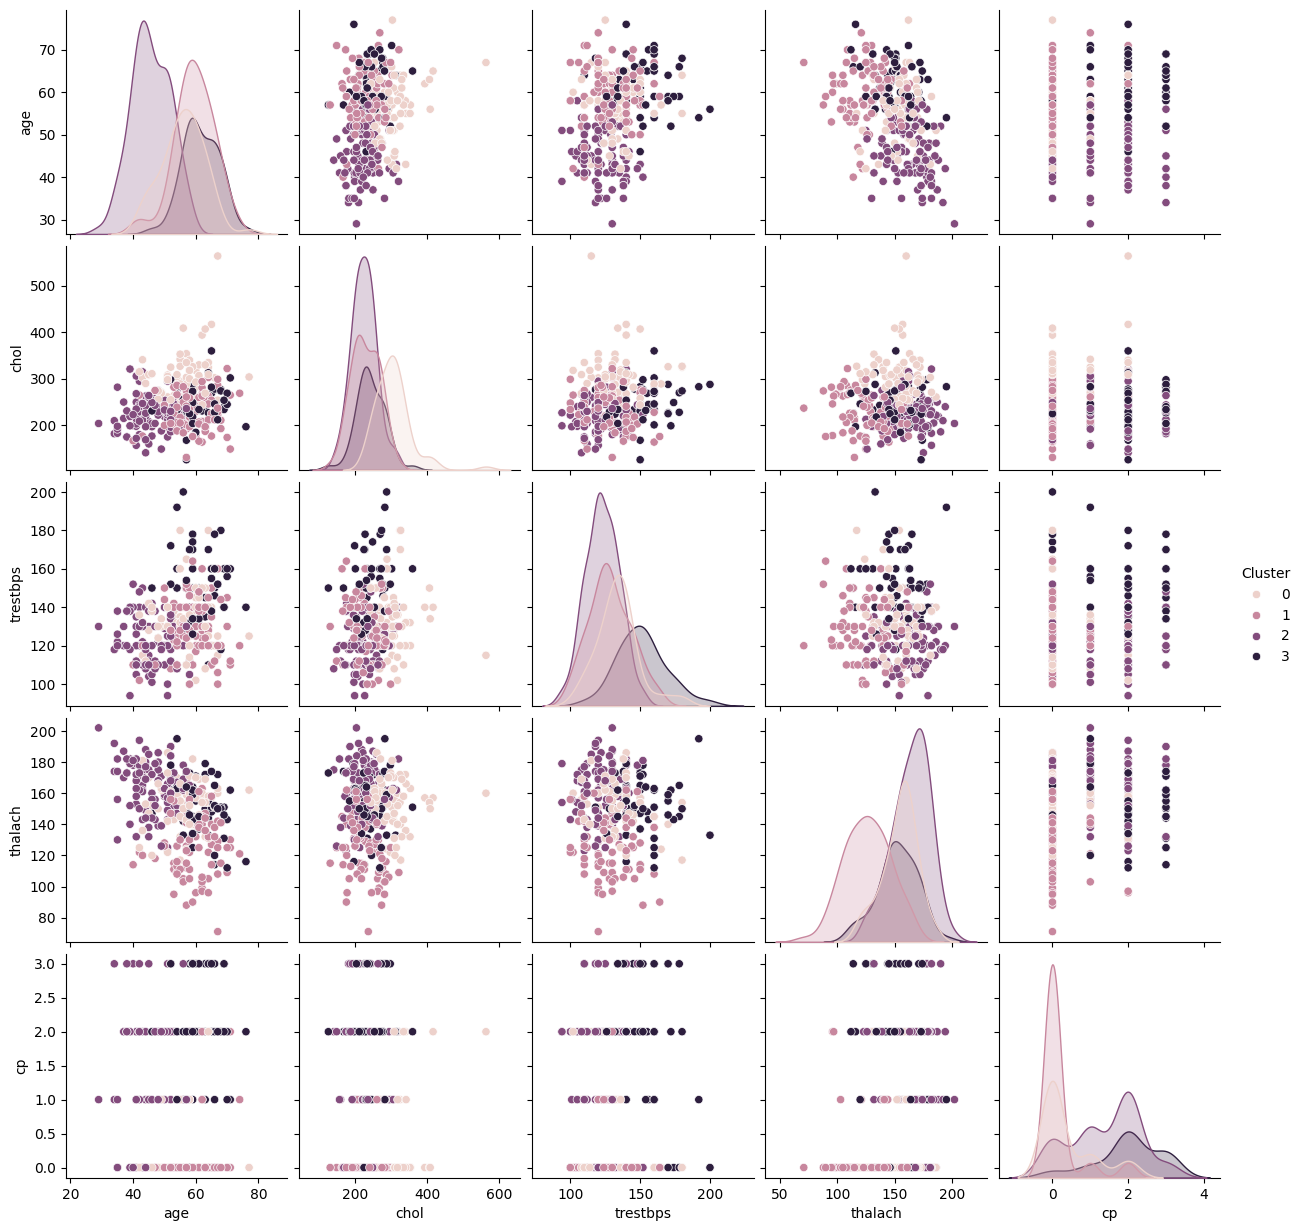

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis que serão usadas para o clustering
features = df[['age', 'chol', 'trestbps', 'thalach', 'cp']]

# Escalar as variáveis
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Adicionar o resultado dos clusters ao dataframe original
df['Cluster'] = kmeans.labels_

# Visualizar os clusters
sns.pairplot(df, hue='Cluster', vars=['age', 'chol', 'trestbps', 'thalach', 'cp'])
plt.show()

Random Forest
F1 Score:  0.8615384615384615


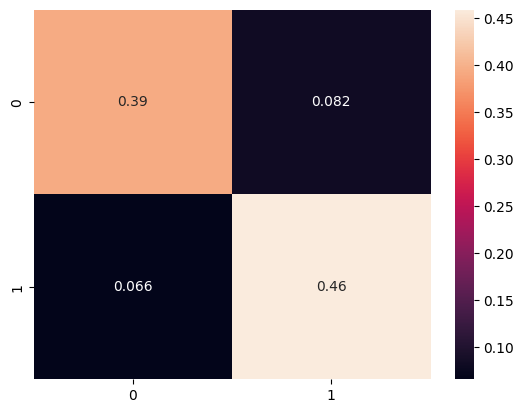

Logistic Regression
F1 Score:  0.8923076923076922


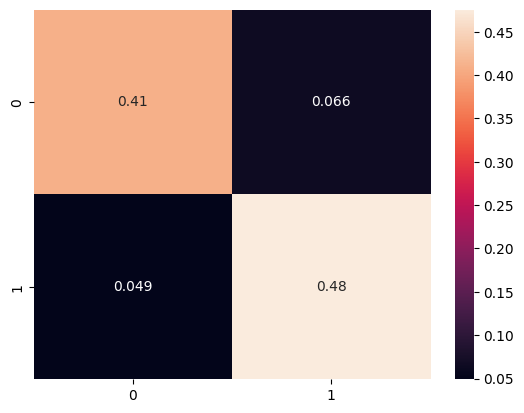

XGBoost
F1 Score:  0.8196721311475409


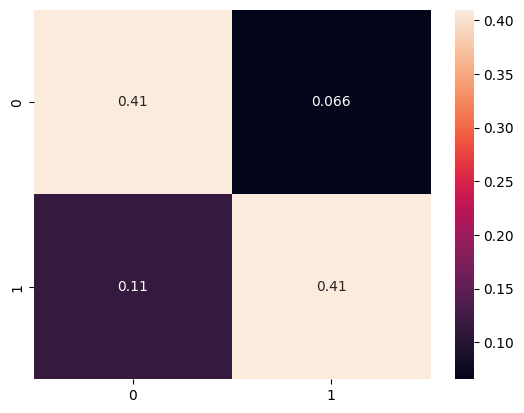

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

models= {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost' : XGBClassifier()
}

for name,model in models.items():
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    print(name)
    print('F1 Score: ',f1_score(Y_test,ypred))
    sns.heatmap(confusion_matrix(Y_test,ypred)/np.sum(confusion_matrix(Y_test,ypred)),annot=True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


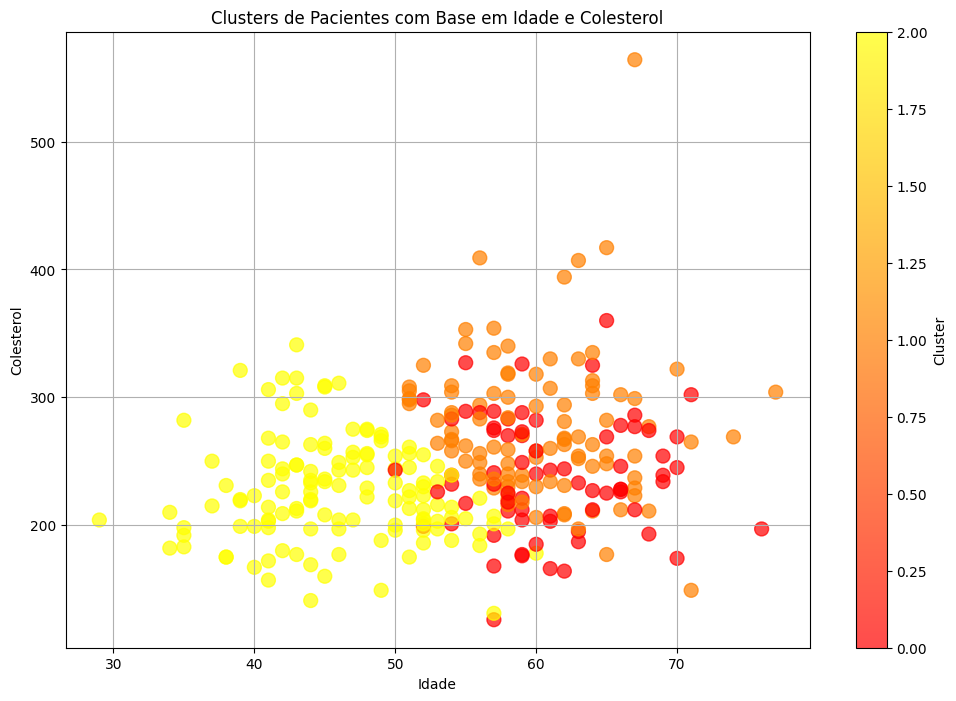

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis para a clusterização
X = df[['age', 'chol', 'trestbps']]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Usar 3 clusters como exemplo
clusters = kmeans.fit_predict(X_scaled)

# Adicionar a coluna de clusters ao DataFrame original
df['cluster'] = clusters

# Visualizar os clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['age'], df['chol'], c=df['cluster'], cmap='autumn', s=100, alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Colesterol')
plt.title('Clusters de Pacientes com Base em Idade e Colesterol')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(columns=['target'])  # 'target' é a coluna alvo que indica presença de doença cardíaca
y = df['target']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Acurácia: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(columns=['target'])  # 'target' é a coluna alvo que indica presença de doença cardíaca
y = df['target']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Acurácia: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obter a importância das variáveis
importances = model.feature_importances_
feature_names = X.columns

# Criar um dicionário para armazenar as importâncias
feature_importances = dict(zip(feature_names, importances))

# Encontrar a variável mais influente
most_important_feature = max(feature_importances, key=feature_importances.get)

print(f"A variável mais influente para prever problemas cardíacos é: {most_important_feature}")

A variável mais influente para prever problemas cardíacos é: predicted_probability
